In [6]:
import os
import zipfile
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [7]:
zip_path = "Bill_dataset.zip"   # change name if needed
base_dir = "data"

os.makedirs(base_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(base_dir)

original_data_dir = os.path.join(base_dir, os.listdir(base_dir)[0])
print("Dataset extracted to:", original_data_dir)

Dataset extracted to: data/Bill_dataset


In [8]:
train_dir = "train"
test_dir = "test"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [9]:
TEST_IMAGES_PER_CLASS = 5

for class_name in os.listdir(original_data_dir):
    class_path = os.path.join(original_data_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    random.shuffle(images)

    test_images = images[:TEST_IMAGES_PER_CLASS]
    train_images = images[TEST_IMAGES_PER_CLASS:]

    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    for img in train_images:
        shutil.copy(
            os.path.join(class_path, img),
            os.path.join(train_dir, class_name, img)
        )

    for img in test_images:
        shutil.copy(
            os.path.join(class_path, img),
            os.path.join(test_dir, class_name, img)
        )

print("Train–Test split completed")

Train–Test split completed


In [10]:
img_size = (128, 128)
batch_size = 16

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 160 images belonging to 4 classes.
Found 37 images belonging to 4 classes.


In [11]:
num_classes = train_data.num_classes

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
epochs = 10

history = model.fit(
    train_data,
    epochs=epochs
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 540ms/step - accuracy: 0.3691 - loss: 1.7749
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 691ms/step - accuracy: 0.5543 - loss: 1.2077
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 549ms/step - accuracy: 0.5851 - loss: 1.1627
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 650ms/step - accuracy: 0.5417 - loss: 1.1330
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 543ms/step - accuracy: 0.5942 - loss: 0.8443
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 783ms/step - accuracy: 0.7430 - loss: 0.6876
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 559ms/step - accuracy: 0.7648 - loss: 0.6175
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 688ms/step - accuracy: 0.7987 - loss: 0.4778
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 536ms/step - accuracy: 0.8668 - loss: 0.3561
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 548ms/step - accuracy: 0.8742 - loss: 0.3850


In [14]:
test_loss, test_accuracy = model.evaluate(test_data)
print("Test Accuracy:", test_accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.6774 - loss: 1.5948
Test Accuracy: 0.7297297120094299


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


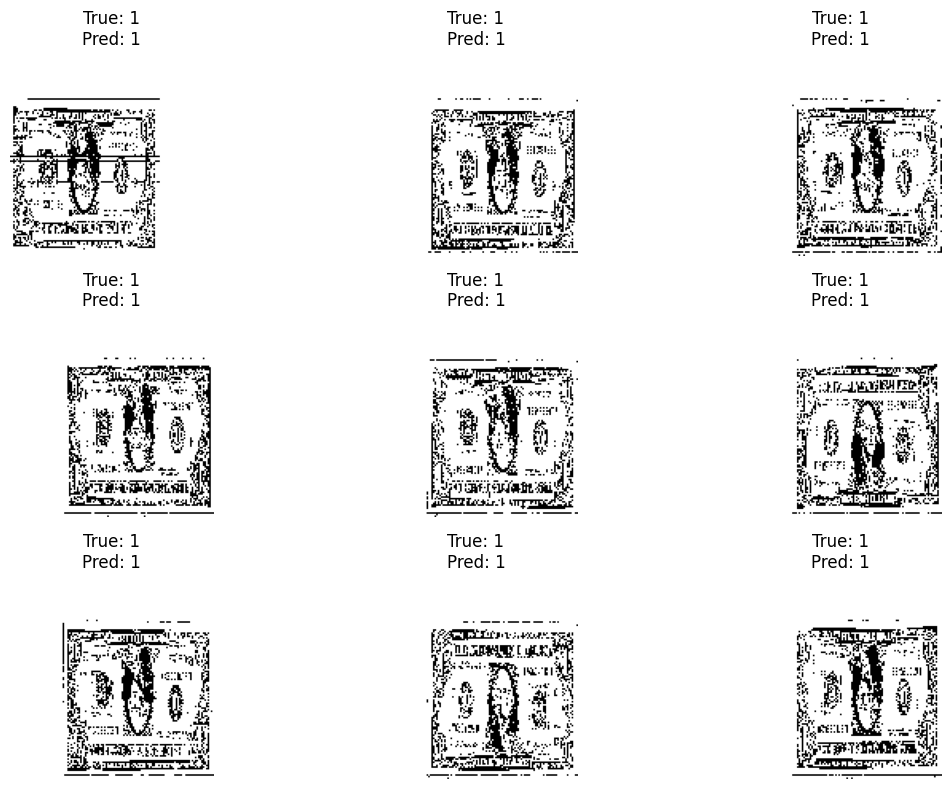

In [15]:
class_labels = {v: k for k, v in train_data.class_indices.items()}

test_data.reset()
images, labels = next(test_data)
predictions = model.predict(images)

plt.figure(figsize=(12, 8))

for i in range(min(9, len(images))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])

    true_label = class_labels[np.argmax(labels[i])]
    pred_label = class_labels[np.argmax(predictions[i])]

    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()